In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE1 = 113
IMAGE_SIZE2 = 150
CHANNELS=3
EPOCHS=15

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/FINAL_DATASET_CROP_MONITORING",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE1,IMAGE_SIZE2),
    batch_size=BATCH_SIZE
)

Found 3023 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['CMV', 'HEALTHY', 'SIGATOKA']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 113, 150, 3)
[0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 2 2 0 2 2 1 1 2 1 0 0 2 1 0 1 1 0]


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
train_ds

<TakeDataset element_spec=(TensorSpec(shape=(None, 113, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
import numpy as np
labels=[]
array1 = np.array([])
for image_batch, labels_batch in test_ds:
  labels.append(labels_batch.numpy())
for i in range(10):
  array1=np.append(array1,labels[i])
lable_list=array1.tolist()


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE1, IMAGE_SIZE2),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE1, IMAGE_SIZE2, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(128, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    layers.Conv2D(256, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(256, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(256, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.Conv2D(512, kernel_size = (3,3), activation='relu', input_shape=input_shape,padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 113, 150, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 113, 150, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (32, 113, 150, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (32, 56, 75, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (32, 56, 75, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (32, 56, 75, 128)         147584    
                                                      

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15,
)

Epoch 1/15
76/76 [==============================] - 266s 2s/step - loss: 1.1210 - accuracy: 0.3209 - val_loss: 1.0999 - val_accuracy: 0.2812
Epoch 2/15
76/76 [==============================] - 249s 2s/step - loss: 1.0981 - accuracy: 0.3549 - val_loss: 1.0977 - val_accuracy: 0.3579
Epoch 3/15
76/76 [==============================] - 246s 2s/step - loss: 1.0977 - accuracy: 0.3503 - val_loss: 1.0928 - val_accuracy: 0.3889
Epoch 4/15
76/76 [==============================] - 248s 2s/step - loss: 1.0977 - accuracy: 0.3491 - val_loss: 1.0967 - val_accuracy: 0.3403
Epoch 5/15
76/76 [==============================] - 248s 2s/step - loss: 1.0980 - accuracy: 0.3499 - val_loss: 1.0966 - val_accuracy: 0.3507
Epoch 6/15
76/76 [==============================] - 248s 2s/step - loss: 1.0974 - accuracy: 0.3520 - val_loss: 1.0942 - val_accuracy: 0.3819
Epoch 7/15
76/76 [==============================] - 249s 2s/step - loss: 1.0969 - accuracy: 0.3549 - val_loss: 1.0944 - val_accuracy: 0.3368
Epoch 8/15
76

In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 119s 65ms/step - loss: 1.0923 - accuracy: 0.3469


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

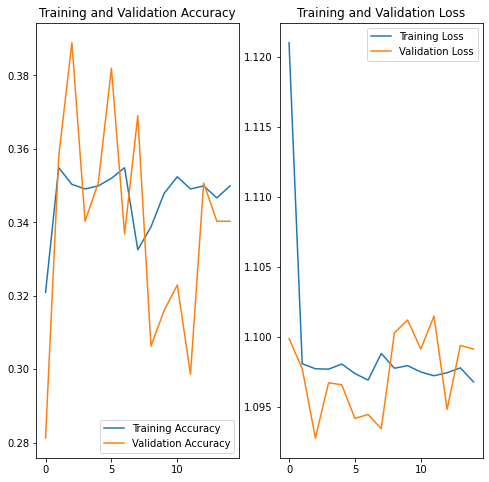

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
#from PIL import Image
from keras.preprocessing.image import img_to_array
import tensorflow as tf
from keras.preprocessing.image import load_img
import numpy as np
import os
#/content/drive/MyDrive/UNTRAINED DATA/UNTRAINED_SIGATOKA.jpg
for image in os.listdir("/content/drive/MyDrive/UNTRAINED_DATA"):
  #img = load_img(image)
  # print("/content/drive/MyDrive/UNTRAINED_DATA"+image)
   #img=img.resize((113,150))
   print(image)
   img = load_img("/content/drive/MyDrive/UNTRAINED_DATA/"+image)
   img=img.resize((150,113))
   img_array = tf.keras.preprocessing.image.img_to_array(img)
   img_array = tf.expand_dims(img_array, 0)
   print(np.argmax(model.predict(img_array)))

UNTRAINED_CMV.jpeg
0
UNTRAINED_SIGATOKA.jpg
0
UNTRAINED_SIGATOKA_1.jpg
0
sigatoka_images.jpg
0
yellow-sigatoka-banana-1563270070.jpg
0
yellow-sigatoka-banana-1563270133.jpg
0
yellow-sigatoka-banana-1563270070 (1).jpg
0
healthy (1).jpg
0
healthy.jpg
0
unknown.jpg
0
cmv_6.jpeg
0
cmv_5.jpeg
0
cmv_4.jpeg
0
cmv_3.jpeg
0
cmv_2.jpeg
0
cmv_1.jpeg
0
